In [2]:
import obspy
import Muenster_Array_Seismology as MAS
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problems, Limitations, Opportunities 

### 1) Perform vespa with theo baz and corrected (observed) baz 

For this part we are using the event 5 May 2003 Philippine event recorded at KNET (Kyrgyz network). This example should show that seismic arrivals can in some cases disappear, especially for strong topography such as in KNET where the observed backazimuth can differ up to 10 degrees from the theoretical backazimuth.

**a)** Choose a time window with absolute time 05-MAY-2003_23:14:35 to 23:15:35.

Produce a vespagram (4th root) with the KNET data (only Z components from KN array) filtered with a bandpass filter of 1-10s or just broadband data. Use the theoretical backazimuth (114 degrees). Try different filters and slowness ranges(do not excees slowness of 12 s/deg) to get the best result. A P wave can be seen and some later phases (sP for example) but no pP wave.


In [2]:
MAS.vespagram?

8 Trace(s) in Stream:
KN.AAK..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.AML..BHZ  | 2003-05-05T23:14:35.000100Z - 2003-05-05T23:15:35.000100Z | 40.0 Hz, 2401 samples
KN.CHM..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.EKS2..BHZ | 2003-05-05T23:14:35.000100Z - 2003-05-05T23:15:35.000100Z | 40.0 Hz, 2401 samples
KN.KBK..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.TKM2..BHZ | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.UCH..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.USP..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
8 Trace(s) in Stream:
KN.USP..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.AAK..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz,

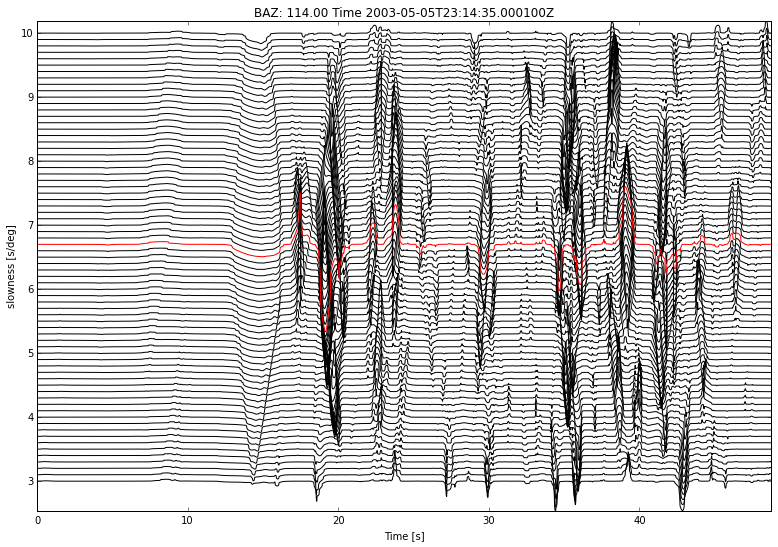

(array([ 3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,
        4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,
        5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,
        6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,
        7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,
        8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,
        9.6,  9.7,  9.8,  9.9]), array([[  5.22155775e-01,   1.44129096e+00,   1.65919094e+00, ...,
          2.51868832e+01,   2.15287990e+01,   8.18584355e+00],
       [  4.56861007e-01,   1.32917782e+00,   1.53444216e+00, ...,
          2.44791152e+01,   2.03946213e+01,   7.23082536e+00],
       [  2.61320098e-01,   4.44628609e-01,   1.32197981e+00, ...,
          1.95429940e+01,   1.49310699e+01,   6.08316550e-01],
       ..., 
       [  8.57447950e-01,   8.23581498e-01,   7.79411949e-01, ...,
          3.24737744e-03,   4.41889391e-05,  -4.77141079e-

In [5]:
st = obspy.read("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/04_KNET/04.mseed").select(network="kn")
t1 = obspy.UTCDateTime(2003, 5, 5, 23, 14, 35)
t2 = obspy.UTCDateTime(2003, 5, 5, 23, 15, 35)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)
print vertical_components

cat = obspy.readEvents("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/04_KNET/04.qml")
ev = cat[0]
inv = obspy.read_inventory("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/04_KNET/04.xml", format='stationxml') 

print(MAS.vespagram(vertical_components, ev, inv, "DLS", frqlow=0.1, frqhigh=4, baz=114, scale=10, nthroot=4, sl=(3, 10, 0.1)))

**b)** Use the P window (absolute time 05-MAY-2003_23:14:55 to 23:15:35) to produce a sloaz analysis and determine the observed backazimuth. An fk-analysis is also possible.

In [15]:
array_analysis_helper?

8 Trace(s) in Stream:
KN.USP..BHZ  | 2003-05-05T23:14:55.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 1601 samples
KN.AAK..BHZ  | 2003-05-05T23:14:55.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 1601 samples
KN.UCH..BHZ  | 2003-05-05T23:14:55.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 1601 samples
KN.KBK..BHZ  | 2003-05-05T23:14:55.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 1601 samples
KN.AML..BHZ  | 2003-05-05T23:14:55.000100Z - 2003-05-05T23:15:35.000100Z | 40.0 Hz, 1601 samples
KN.CHM..BHZ  | 2003-05-05T23:14:55.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 1601 samples
KN.TKM2..BHZ | 2003-05-05T23:14:55.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 1601 samples
KN.EKS2..BHZ | 2003-05-05T23:14:55.000100Z - 2003-05-05T23:15:35.000100Z | 40.0 Hz, 1601 samples
1599
Total time in routine: 0.360788

2003-05-05T23:14:55.000100Z


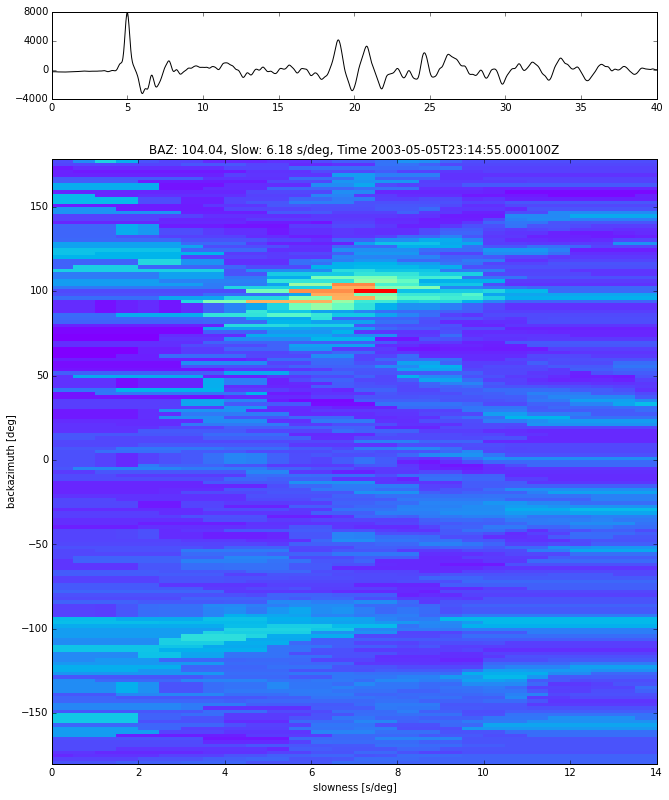

None


In [6]:
st = obspy.read("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/04_KNET/04.mseed").select(network="kn")
vertical_components = st.select(component="Z")
t1 = obspy.UTCDateTime(2003, 5, 5, 23, 14, 55)
t2 = obspy.UTCDateTime(2003, 5, 5, 23, 15, 35)
vertical_components.trim(t1, t2) 

print MAS.array_analysis_helper(vertical_components, inv, method="FK", frqlow=0.1, frqhigh=4, baz_plot=True, wlen=-1, sls=0.5, array_response=False)

**c)** In a third step produce a vespa 4th root with observed baz (measure doing sloaz or use the azimuth 104 degrees, or correct for mislocation vectors). use the time range as in the first vespagram.

8 Trace(s) in Stream:
KN.USP..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.AAK..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.UCH..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.KBK..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.AML..BHZ  | 2003-05-05T23:14:35.000100Z - 2003-05-05T23:15:35.000100Z | 40.0 Hz, 2401 samples
KN.CHM..BHZ  | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.TKM2..BHZ | 2003-05-05T23:14:35.000000Z - 2003-05-05T23:15:35.000000Z | 40.0 Hz, 2401 samples
KN.EKS2..BHZ | 2003-05-05T23:14:35.000100Z - 2003-05-05T23:15:35.000100Z | 40.0 Hz, 2401 samples
Total time in routine: 0.137416

1905


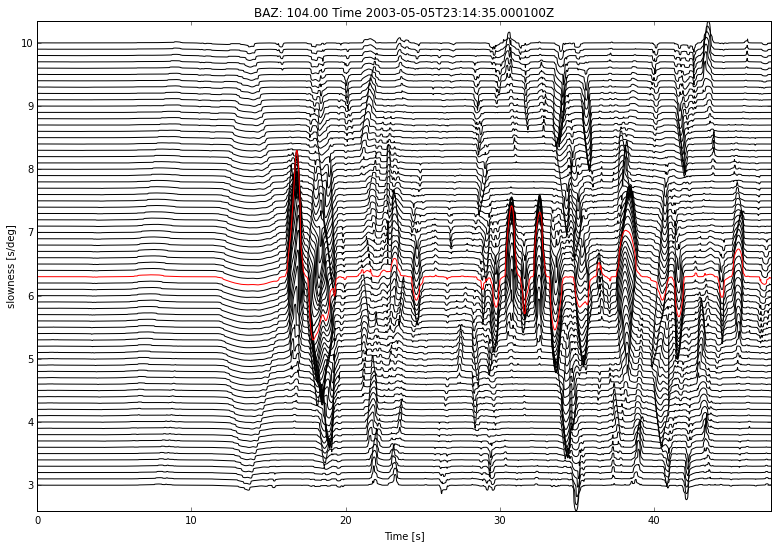

(array([ 3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,
        4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,
        5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,
        6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,
        7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,
        8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,
        9.6,  9.7,  9.8,  9.9]), array([[  5.70420406e+00,   5.17408761e+00,   4.30828191e+00, ...,
          7.18039759e+00,   2.54431084e+01,   2.95462855e+01],
       [  4.74277815e+00,   1.96021199e+00,   1.54365952e+00, ...,
          7.29784619e+00,   2.52060219e+01,   2.84137967e+01],
       [  1.51497586e+00,   1.37828706e+00,   1.21877163e+00, ...,
          6.14269760e+00,   2.31894719e+01,   2.67241271e+01],
       ..., 
       [  2.48240234e+00,   2.58289333e+00,   2.64310319e+00, ...,
          9.56118770e-05,   1.82642882e-03,  -5.04762221e-

In [7]:
st = obspy.read("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/04_KNET/04.mseed").select(network="kn")
t1 = obspy.UTCDateTime(2003, 5, 5, 23, 14, 35)
t2 = obspy.UTCDateTime(2003, 5, 5, 23, 15, 35)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)
cat = obspy.readEvents("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/04_KNET/04.qml")
ev = cat[0]
inv = obspy.read_inventory("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/04_KNET/04.xml", format='stationxml') 

print MAS.vespagram(vertical_components, ev, inv, "DLS", frqlow=0.1, frqhigh=4, baz=104, scale=20, nthroot=4, sl=(3, 10, 0.1))

**NOTE:** A pP arrival appears between P and sP, which was absent before

### 2) Example of scattering 

For this event we are looking for scattering as precursors to the phase PKP. 

**a)** Read in event 4 Oct 2002   (event 5), an event from Tonga recorded at the EAGLE array in Ethiopia. Delete station WOLE (trace 29) since this had some recording problems.

Filter the event with a filter from 1-10s and align them to the correct start time (they are cut each trace 600 s before first P). Then plot the traces distance dependent and cut the traces to 
a time between 750 and 810 s (or absolute 4-oct-02_19:23:43 to 19:24:43)
When comparing to scattering observations (e.g. Manchinelli et al., 2013, Heldin, Shearer and Earle, 1997 etc, there does not seem to be any scattering in this dataset. Marking the arrival time of PKPdf puts this at the first arriving wave.


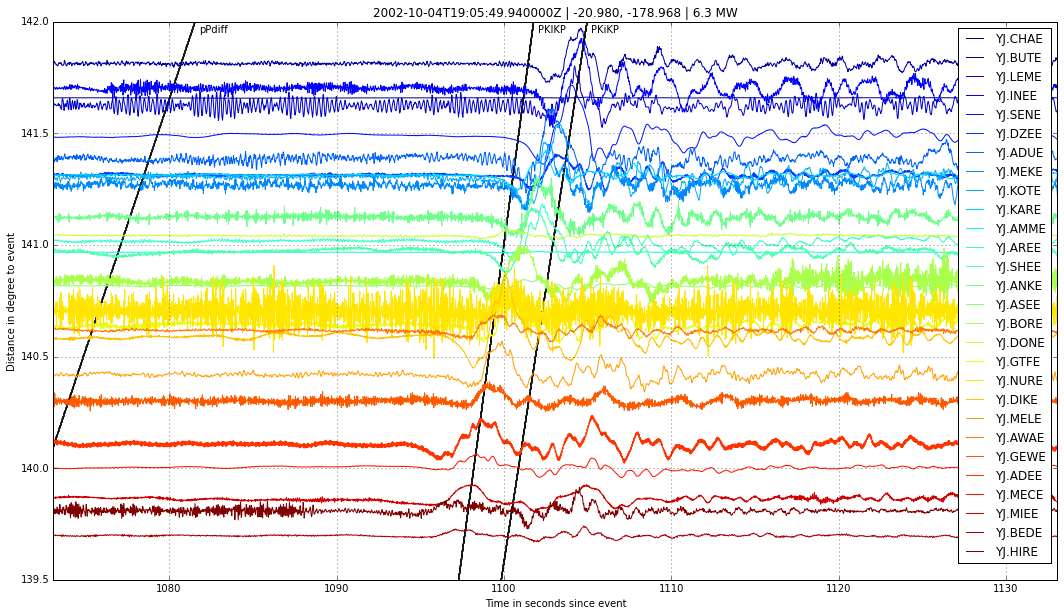

In [9]:
st = obspy.read("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/05_EAGLE/05.mseed")
for tr in st.select(station="WOLE"):
    st.remove(tr)

t1 = obspy.UTCDateTime(2002, 10, 4, 19, 23, 43)
t2 = obspy.UTCDateTime(2002, 10, 4, 19, 24, 43)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)
cat = obspy.readEvents("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/05_EAGLE/05.qml")
ev = cat[0]
inv = obspy.read_inventory("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/05_EAGLE/05.xml", format='STATIONXML')

MAS.show_distance_plot(stream=vertical_components, event=cat[0], inventory=inv, starttime=t1, endtime=t2)

**b)** Produce a 4th root vespagram for the time range as above. The first arrival has a slowness of around 3.8s/deg. The theoretical slowness of PKPdf is around 1.9 for this distance range. The first arrival either has a large slowness deviation or is not PKPdf. A second arrival can be seen with a slowness of 1.9s/deg which is PKPdf. 

28 Trace(s) in Stream:

YJ.HIRE..BHZ | 2002-10-04T19:23:43.000000Z - 2002-10-04T19:24:43.000000Z | 50.0 Hz, 3001 samples
...
(26 other traces)
...
YJ.MEKE..BHZ | 2002-10-04T19:23:43.000000Z - 2002-10-04T19:24:43.000000Z | 50.0 Hz, 3001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
Total time in routine: 0.448190

2282


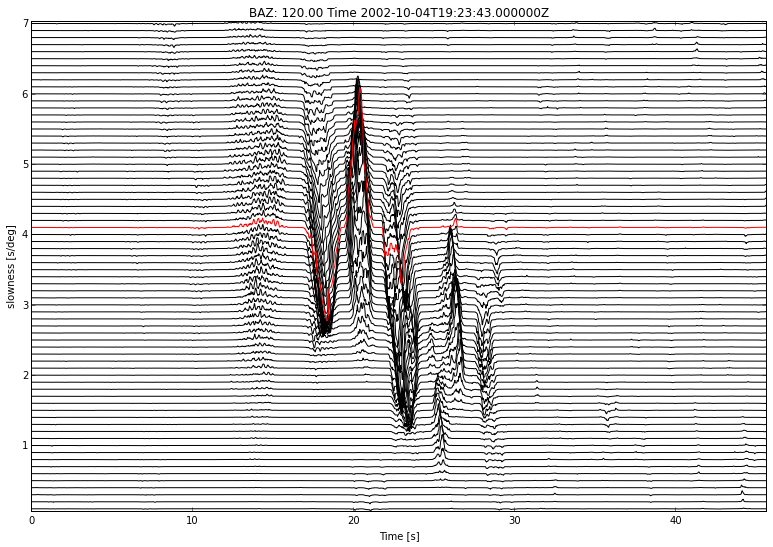

(array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9]), array([[  4.50963851e-05,   1.04898680e-02,   4.58763482e-02, ...,
          8.59482610e-08,  -4.23943689e-07,  -3.64199918e-04],
       [  2.22316555e-03,   1.84605027e-02,   2.25684259e-02, ...,
          1.21931676e-07,   2.65999648e-09,  -2.38791903e-08],
       [ -1.16448783e-04,  -5.38746983e-07,   9.43612436e-03, ...,
          5.47251497e-05,   6.16687731e-02,   1.12634458e-01],
       ..., 
       [ -3.82930544e-05,   1.25646414e-06,   1.93707180e-03, ...,
          8.34405939e+00,   7.73877719e+00,   5.73650949e+00],
 

In [10]:
print MAS.vespagram(vertical_components, ev, inv, "DLS", frqlow=0.1, frqhigh=4, baz=120, scale=20, nthroot=4, sl=(0.1, 7, 0.1))

The first arrival is PKPbdiff, the diffracted wave from the b-caustic point of PKP.

### 3) Perform search for out-of plane signals with sloaz analysis.

Use the Morocco Data (event 14 Aug 12,  #3 in Table 1) and filter the data with a bandpass filter of 3-25s. 
Perform a sloaz analysis for 10 s windows for the following time windows:

1) Absolute time (14-AUG-2012_3:12 to 3:12:10)

2) Absolute time (14-Aug-2012_3:13:20 to 3:13:30)

3) Absolute time (14-AUG-2012_3:13:50 to 3:14:05)
 
Plot the results: the P-wave arrives with the theoretical azimuth, search for later phases with different azimuths in the following windows.

14 Trace(s) in Stream:
3D.MM09..HHZ | 2012-08-14T03:12:00.000000Z - 2012-08-14T03:12:10.000000Z | 20.0 Hz, 201 samples
3D.MM13..HHZ | 2012-08-14T03:12:00.000000Z - 2012-08-14T03:12:10.000000Z | 20.0 Hz, 201 samples
3D.MM05..HHZ | 2012-08-14T03:12:00.000000Z - 2012-08-14T03:12:10.000000Z | 20.0 Hz, 201 samples
3D.MM01..HHZ | 2012-08-14T03:12:00.000000Z - 2012-08-14T03:12:10.000000Z | 20.0 Hz, 201 samples
3D.MM11..HHZ | 2012-08-14T03:12:00.010000Z - 2012-08-14T03:12:10.010000Z | 20.0 Hz, 201 samples
3D.MM07..HHZ | 2012-08-14T03:12:00.000000Z - 2012-08-14T03:12:10.000000Z | 20.0 Hz, 201 samples
3D.MM03..HHZ | 2012-08-14T03:12:00.000000Z - 2012-08-14T03:12:10.000000Z | 20.0 Hz, 201 samples
3D.MM04..HHZ | 2012-08-14T03:12:00.000000Z - 2012-08-14T03:12:10.000000Z | 20.0 Hz, 201 samples
3D.MM12..HHZ | 2012-08-14T03:12:00.000000Z - 2012-08-14T03:12:10.000000Z | 20.0 Hz, 201 samples
3D.MM06..HHZ | 2012-08-14T03:12:00.000000Z - 2012-08-14T03:12:10.000000Z | 20.0 Hz, 201 samples
3D.MM10..HHZ | 20

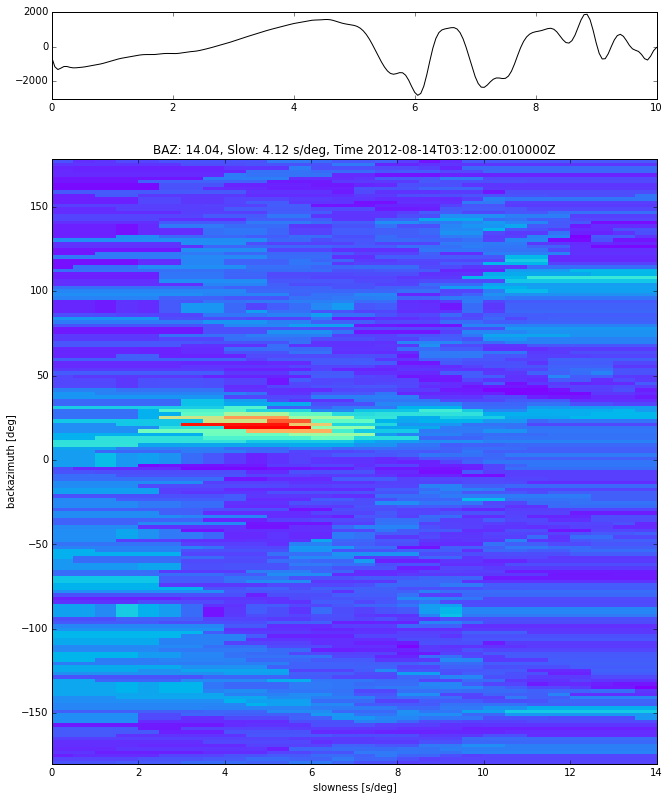

None


In [11]:
st = obspy.read("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/02_MM/02.mseed")
t1 = obspy.UTCDateTime(2012, 8, 14, 3, 12, 0)
t2 = obspy.UTCDateTime(2012, 8, 14, 3, 12, 10)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)
cat = obspy.readEvents("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/02_MM/02.qml")
ev = cat[0]
inv = obspy.read_inventory("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/02_MM/02.xml", format='STATIONXML')

print MAS.array_analysis_helper(vertical_components, inv, method="FK", frqlow=0.1, frqhigh=4, baz_plot=True, wlen=-1, sls=0.5, array_response=False)

14 Trace(s) in Stream:
3D.MM09..HHZ | 2012-08-14T03:13:20.000000Z - 2012-08-14T03:13:30.000000Z | 20.0 Hz, 201 samples
3D.MM13..HHZ | 2012-08-14T03:13:20.000000Z - 2012-08-14T03:13:30.000000Z | 20.0 Hz, 201 samples
3D.MM05..HHZ | 2012-08-14T03:13:20.000000Z - 2012-08-14T03:13:30.000000Z | 20.0 Hz, 201 samples
3D.MM01..HHZ | 2012-08-14T03:13:20.000000Z - 2012-08-14T03:13:30.000000Z | 20.0 Hz, 201 samples
3D.MM11..HHZ | 2012-08-14T03:13:20.010000Z - 2012-08-14T03:13:30.010000Z | 20.0 Hz, 201 samples
3D.MM07..HHZ | 2012-08-14T03:13:20.000000Z - 2012-08-14T03:13:30.000000Z | 20.0 Hz, 201 samples
3D.MM03..HHZ | 2012-08-14T03:13:20.000000Z - 2012-08-14T03:13:30.000000Z | 20.0 Hz, 201 samples
3D.MM04..HHZ | 2012-08-14T03:13:20.000000Z - 2012-08-14T03:13:30.000000Z | 20.0 Hz, 201 samples
3D.MM12..HHZ | 2012-08-14T03:13:20.000000Z - 2012-08-14T03:13:30.000000Z | 20.0 Hz, 201 samples
3D.MM06..HHZ | 2012-08-14T03:13:20.000000Z - 2012-08-14T03:13:30.000000Z | 20.0 Hz, 201 samples
3D.MM10..HHZ | 20

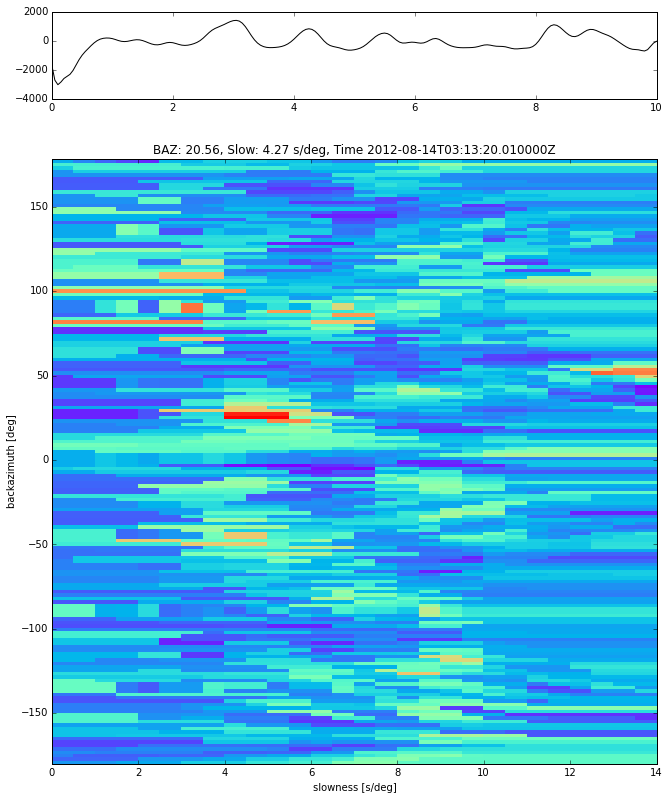

None


In [12]:
st = obspy.read("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/02_MM/02.mseed")
t1 = obspy.UTCDateTime(2012, 8, 14, 3, 13, 20)
t2 = obspy.UTCDateTime(2012, 8, 14, 3, 13, 30)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)

print MAS.array_analysis_helper(vertical_components, inv, method="FK", frqlow=0.1, frqhigh=4, baz_plot=True, wlen=-1, sls=0.5, array_response=False)

14 Trace(s) in Stream:
3D.MM09..HHZ | 2012-08-14T03:13:50.000000Z - 2012-08-14T03:14:05.000000Z | 20.0 Hz, 301 samples
3D.MM13..HHZ | 2012-08-14T03:13:50.000000Z - 2012-08-14T03:14:05.000000Z | 20.0 Hz, 301 samples
3D.MM05..HHZ | 2012-08-14T03:13:50.000000Z - 2012-08-14T03:14:05.000000Z | 20.0 Hz, 301 samples
3D.MM01..HHZ | 2012-08-14T03:13:50.000000Z - 2012-08-14T03:14:05.000000Z | 20.0 Hz, 301 samples
3D.MM11..HHZ | 2012-08-14T03:13:50.010000Z - 2012-08-14T03:14:05.010000Z | 20.0 Hz, 301 samples
3D.MM07..HHZ | 2012-08-14T03:13:50.000000Z - 2012-08-14T03:14:05.000000Z | 20.0 Hz, 301 samples
3D.MM03..HHZ | 2012-08-14T03:13:50.000000Z - 2012-08-14T03:14:05.000000Z | 20.0 Hz, 301 samples
3D.MM04..HHZ | 2012-08-14T03:13:50.000000Z - 2012-08-14T03:14:05.000000Z | 20.0 Hz, 301 samples
3D.MM12..HHZ | 2012-08-14T03:13:50.000000Z - 2012-08-14T03:14:05.000000Z | 20.0 Hz, 301 samples
3D.MM06..HHZ | 2012-08-14T03:13:50.000000Z - 2012-08-14T03:14:05.000000Z | 20.0 Hz, 301 samples
3D.MM10..HHZ | 20

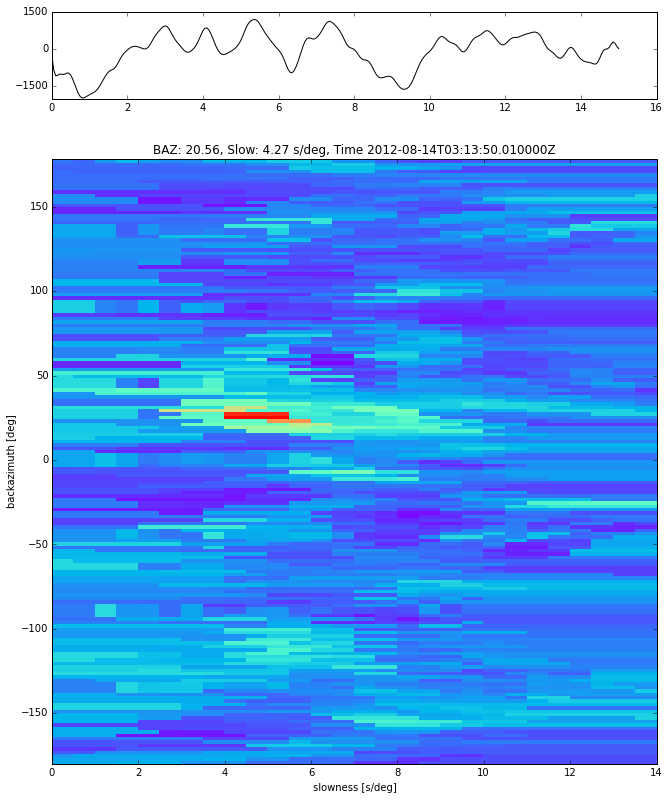

None


In [13]:
st = obspy.read("/Users/admin/Desktop/MESS_2014/OBSPY_Array_Seismology/data/02_MM/02.mseed") 
t1 = obspy.UTCDateTime(2012, 8, 14, 3, 13, 50)
t2 = obspy.UTCDateTime(2012, 8, 14, 3, 14, 5)
vertical_components = st.select(component="Z")
vertical_components.trim(t1, t2)

print MAS.array_analysis_helper(vertical_components, inv, method="FK", frqlow=0.1, frqhigh=4, baz_plot=True, wlen=-1, sls=0.5, array_response=False)